In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mapping.csv")

In [3]:
df['sequence'] = df.apply(lambda x: ''.join(x[1:9]), axis=1)

In [4]:
df

,Cultivar ID,vg0130976864,vg0135617816,vg0138428840,vg0713178880,vg0819793460,vg1019044175,vg1123563633,vg1207667840,Subpopulation,Plant Height (cm),sequence
0,C001,G,C,T,T,T,C,T,C,Indica I,144.13,GCTTTCTC
1,C002,G,C,C,T,T,C,C,C,VI/Aromatic,177.62,GCCTTCCC
2,C003,G,C,T,T,N,C,T,T,Japonica Intermediate,141.57,GCTTNCTT
3,C004,G,C,T,A,A,C,T,C,Temperate Japonica,140.40,GCTAACTC
4,C005,G,C,T,A,A,T,T,C,Tropical Japonica,163.33,GCTAATTC
...,...,...,...,...,...,...,...,...,...,...,...,...
524,W326,G,C,T,T,A,C,T,C,Japonica Intermediate,155.40,GCTTACTC
525,W327,A,C,T,T,A,C,T,C,Temperate Japonica,89.80,ACTTACTC
526,W328,A,C,T,T,A,C,T,T,Intermediate,117.40,ACTTACTT
527,W329,G,C,T,T,A,T,T,C,Tropical Japonica,147.40,GCTTATTC


In [5]:
df.to_csv("mapping.csv", index=False)

In [10]:
# sequences = []
# for i in range(df.shape[0]):
#     sequences.append((df.iloc[i, 0], df.iloc[i, 11], df.iloc[i, 9]))

In [7]:
sequences = []
for i in range(df.shape[0]):
    sequences.append((df.iloc[i, 0], df.iloc[i, 11]))

In [8]:
sequences

[('C001', 'GCTTTCTC'),
 ('C002', 'GCCTTCCC'),
 ('C003', 'GCTTNCTT'),
 ('C004', 'GCTAACTC'),
 ('C005', 'GCTAATTC'),
 ('C006', 'GCTTATTT'),
 ('C007', 'GCTTATTT'),
 ('C008', 'GCTTATTC'),
 ('C009', 'GCTTATTT'),
 ('C010', 'GCTTACTT'),
 ('C011', 'GCTTATTT'),
 ('C012', 'ACTAACTT'),
 ('C013', 'GCCTTCTC'),
 ('C014', 'ACTTATTT'),
 ('C015', 'GCCTTCTC'),
 ('C016', 'GCTTACTT'),
 ('C017', 'ACTTACTT'),
 ('C018', 'ACTTACTT'),
 ('C019', 'GCTTATTT'),
 ('C020', 'GCTTATTT'),
 ('C021', 'GCTTATTT'),
 ('C022', 'GCTTATTT'),
 ('C023', 'GCTTACTT'),
 ('C024', 'ACTTATTT'),
 ('C025', 'GCTTATTT'),
 ('C026', 'ACTTACTT'),
 ('C027', 'GCTTATTC'),
 ('C028', 'ACTTACTT'),
 ('C029', 'ACTTACTT'),
 ('C030', 'GCTTATTT'),
 ('C031', 'GCTTATTT'),
 ('C032', 'ACTTACTT'),
 ('C033', 'GCTTATTT'),
 ('C034', 'GCTTACTT'),
 ('C035', 'ACTTACTT'),
 ('C036', 'GCTTTTTT'),
 ('C037', 'GCTTATTT'),
 ('C038', 'GCTTATTT'),
 ('C039', 'GCTTATTT'),
 ('C040', 'GCTTATTT'),
 ('C041', 'GCTTATTC'),
 ('C042', 'GCTTATTT'),
 ('C043', 'GCTTATTT'),
 ('C044', '

In [10]:
# filename = 'sequences.fasta'
#
# # open the output file for writing
# with open(filename, 'w') as f:
#
#     # iterate over each sequence and write to the file in FASTA format
#     for seq in sequences:
#         cultivar_id, sequence, subpopulation  = seq
#         subPop = "_".join(subpopulation.split())
#         name = cultivar_id + "_" + subPop
#         f.write(f'>{name}\n{sequence}\n')

In [12]:
filename = 'sequences.fasta'

# open the output file for writing
with open(filename, 'w') as f:

    # iterate over each sequence and write to the file in FASTA format
    for seq in sequences:
        cultivar_id, sequence = seq
        name = cultivar_id
        f.write(f'>{name}\n{sequence}\n')

In [2]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
from Bio.Align.Applications import ClustalwCommandline

cline = ClustalwCommandline("clustalw2", infile = "sequences.fasta", outfile = "sequences.aln")
stderr, stdout = cline()


In [5]:
# Read in the FASTA file and perform a multiple sequence alignment
alignment = AlignIO.read("out.aln", "fasta")

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the tree using the UPGMA
constructor = DistanceTreeConstructor(calculator, 'upgma')
tree = constructor.build_tree(alignment)

# Visualize the tree
print(Phylo.draw_ascii(tree))

       _____________ W128
      |
      |                    ____ W119
      |                   |
      |                   |    , C012
      |                   |    |
      |                   |    | W193
      |                   |    |
      |                   |    | W250
      |               ____|    |
      |              |    |    | C149
      |              |    |    |
      |              |    |    | C120
      |              |    |    |
      |              |    |    | C172
      |              |    |    |
      |              |    |____| W249
      |              |         |
      |         _____|         | W060
      |        |     |
      |        |     |             , C185
      |        |     |             |
      |        |     |             | W323
      |        |     |             |
      |        |     |             | W021
      |        |     |             |
      |        |     |          ___| C052
      |        |     |         |   |
  ____|        |     |_____

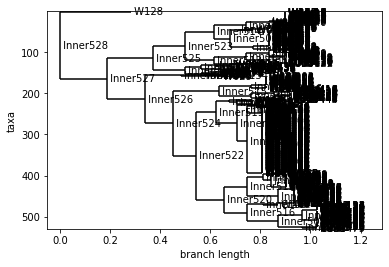

In [27]:
# clustal | upgma
Phylo.draw(tree)

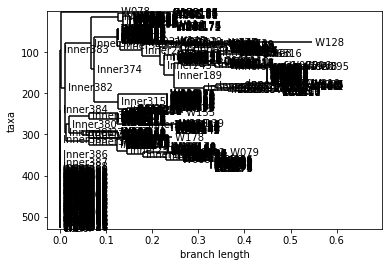

In [24]:
# muscle | nj
Phylo.draw(tree)

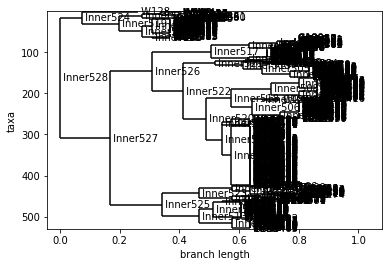

In [6]:
# muscle | upgma
Phylo.draw(tree)

In [19]:
# script to run muscle command line

import subprocess

# Set the input and output file names
input_file = "sequences.fasta"
output_file = "ou1.fasta"

# Define the MUSCLE command as a list of arguments
muscle_command = ["muscle", "-align", input_file, "-output", output_file]

# Run the MUSCLE command using subprocess
process = subprocess.Popen(muscle_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# Get the standard output and error messages
stdout, stderr = process.communicate()

# Print the standard output and error messages
print(stdout.decode())
print(stderr.decode())




muscle 5.1.osxarm64 [ef62d8-dirty]  8.6Gb RAM, 8 cores
Built Jan 15 2022 11:59:50
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 529 seqs, avg length 8, max 8

00:00 24Mb   CPU has 8 cores, running 8 threads
00:00 291Mb   100.0% Calc posteriors  
00:07 717Mb   100.0% Consistency (1/2)  
00:12 866Mb   100.0% Consistency (2/2)  
00:12 870Mb   100.0% UPGMA5           
00:15 913Mb   100.0% Refining



In [26]:
Phylo.write(tree, "tree.nwk", "newick")

1

In [8]:
from Bio import SeqIO

records = SeqIO.parse("out.aln", "fasta")
count = SeqIO.write(records, "out.phylip", "phylip")
print("Converted %i records" % count)

Converted 529 records


In [12]:
treeX = Phylo.read("treeX.nwk", "newick")

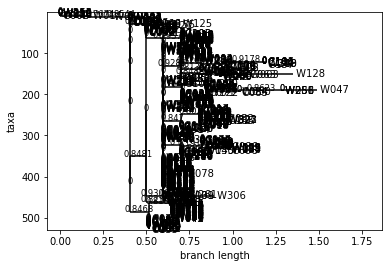

In [13]:
Phylo.draw(treeX)